In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import numpy.ma as ma
#import matplotlib #only needed to determine Matplotlib version number
import sys
import re
import time
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import stats

/home/caioruman/anaconda3/envs/py3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/caioruman/anaconda3/envs/py3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [69]:
# Get the Inversion gradient for each day
yeari = 1986
yearf = 2015
stations = open('stations_arctic_step4.txt', 'r')
cols=["INV_S", "INV_F", "Hour", "Date", "STN_Number"]
cols=["GRADT", "INV_S", "Date", "Year", "Month", "Day", "Hour", "STN_Number"]
grad_temp_pres, inv_strength, dt, dt.year, dt.month, dt.day, dt.hour
df_list = []
i = 0
# Loop throught all the stations
for line in stations:
    df_list = []
    aa = line.split(';')
    stn_number = aa[0].replace("''", '')

    if stn_number == "#":
        #skip line
        print("skipped ",aa[2], stn_number)
        continue
    print(aa)
    stn_name = aa[1].replace('(', '').replace(')', '').replace(' ', '_').replace("''", '').replace("\n", '').replace("/", '_')

    print(stn_name, stn_number)
    
    #Open interpolated file
    #arq = "{0}/soundings_{1}_interp.csv".format(stn_name, stn_number)
    arq = "Stations/{0}/soundings_{1}_interp_v3.csv".format(stn_name, stn_number)
    df = pd.read_csv(arq, index_col=0)
    
    dt = datetime(yeari, 1, 1, 0, 0)
    date_f = datetime(yearf, 12, 31, 12, 0)
    
    # Calculate the monthly values
    
    if not df.empty:
        while dt <= date_f:            
            for tt in [0, 12]:
                # Filter for the values of the first level and 925 hPa
                             
                
                df_1000 = df.query("Year == {0} and Month == {1} and Day == {2} and Hour == {3}".format(dt.year, dt.month, dt.day, tt))
                df_925 = df.query("Year == {0} and Month == {1} and Day == {2} and PRES == {3} and Hour == {4}".format(dt.year, dt.month, dt.day, 925, tt))
                    
                # If there are no data on the selected date
                if (len(df_1000.index) == 0):
                    #print(df_1000.index, dt, tt) 
                    continue
                                    
                # Selecting the first level with data
                ok = True
                i = 0
                while (ok):
                    if not np.isnan(df_1000.iloc[i].TEMP):
                        ok = False
                        tmp = df_1000.iloc[i].TEMP
                        pres = df_1000.iloc[i].PRES
                    else:
                        i += 1
                
                tmp_925 = df_925.TEMP.values[0]
                pres_925 = df_925.PRES.values[0]                                                
                
                temp_diff = tmp-tmp_925                
                pres_diff = pres-pres_925
                
                grad_temp_pres = temp_diff/pres_diff  # in K/hPa
                inv_strength = grad_temp_pres*(75) # in K. Inversion between 925 and 1000 hPa
                
                #filter high values
                if (inv_strength > 30):
                    continue
                
                df_list.append((grad_temp_pres, inv_strength, dt, dt.year, dt.month, dt.day, tt, stn_number))

                # number of inversions
                #inv_number = sum(temp_diff > 0)
                #no_inv_number = sum(temp_diff <= 0)
                # percentage of inversions
                #try:
                #    inv_perc = float(inv_number)*100/(inv_number+no_inv_number)
                #except:
                #    inv_perc = 0

                # Inversion Intensity        
                #inv_intensity = np.nanmean(temp_diff[temp_diff > 0])                        

                # Add the values to a list/array/tuple/etc
                # Inversion Intensity, Percentage, Hour, Datetime, Station Number
                #df_list.append([inv_intensity, inv_perc, tt, dd, stn_number])
                #i += 1
                               
            dt = dt + timedelta(hours=24)    
    df_end = pd.DataFrame(df_list, columns=cols)
    df_end.to_csv("Stations/{0}/soundings_{1}_inversion.csv".format(stn_name, stn_number), encoding='utf-8')

['01001', '01001  Jan Mayen (ENJA)\n']
01001__Jan_Mayen_ENJA 01001


KeyboardInterrupt: 

In [2]:
# Calculate the mean inversion strength and the mean inversion percentage
yeari = 1986
yearf = 2015
stations = open('latlonlist_v2.txt', 'r')
df_list = []
i = 0
# Loop throught all the stations
#outdata = open('inv_list.dat', 'w')
#outdata.write("Station_number;Latitude;Longitude;Inv_00;Inv_P_00;Inv_12;Inv_P_12;Inv_TT;Inv_P_TT;TotalYear;TotalYearTT\n")
for line in stations:
    df_list = []
    aa = line.split(';')
    stn_number = aa[0].replace("''", '')
    stn_lat = aa[3].replace("\n",'')
    stn_lon = aa[5].replace("\n",'')
    stn_name = aa[1]

    # Just in the testing phase
    #if stn_number == "#":
        #skip line
        #print("skipped ",aa[2], stn_number)
    #    stn_number = aa[1].replace("''", '')
    #    print(stn_number)        
    #else:
    #    continue
    #print(aa)
    # change to 1 later
    #stn_name = aa[2].replace('(', '').replace(')', '').replace(' ', '_').replace("''", '').replace("\n", '').replace("/", '_')

    print(stn_name, stn_number, stn_lat, stn_lon)
    
    #Open interpolated file
    #arq = "{0}/soundings_{1}_interp.csv".format(stn_name, stn_number)
    arq = "Stations/{0}/soundings_{1}_inversion.csv".format(stn_name, stn_number)
    print(arq)
    df = pd.read_csv(arq, index_col=0)        
    sys.exit()
    if not df.empty:
        aux = []
        years = np.zeros((2))
        for tt in [0,12,100]:
            if tt != 100:
                df2 = df.query("Hour == {0}".format(tt))
                years[0] = len(df2.index)/365
            else:
                df2 = df
                years[1] = len(df2.index)/365/2
                
            inv = df2.INV_S.values
            inv_num = len(inv[inv>0])
            total = len(inv)
            inv_perc = (inv_num/total)*100
            inv_mean = np.mean(inv[inv>0])
            aux.append((inv_mean, inv_perc))            
            
        print(aux)
        if (years[0] >= 20):
            outdata.write("{0};{1};{2};{3:2.3f};{4:3.3f};{5:2.3f};{6:3.3f};{7:2.3f};{8:3.3f};{9:3.3f};{10:3.3f}\n".format(stn_number,stn_lat,stn_lon,aux[0][0],aux[0][1],aux[1][0],aux[1][1],aux[2][0],aux[2][1], years[0], years[1]))
        else:
            print("Not enough years",stn_number,years)
#        "Station_number;Latitude;Longitude;Inv_00;Inv_P_00;Inv_12;Inv_P_12;Inv_TT;Inv_P_TT;TotalYear;TotalYearTT\n"
        sys.exit()
        
stations.close()
outdata.close()

01001__Jan_Mayen_ENJA 01001 70.93 -8.65
Stations/01001__Jan_Mayen_ENJA/soundings_01001_inversion.csv


SystemExit: 

/home/caioruman/anaconda3/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
inv = np.array(df.query("Hour == 0 and (1 <= Month <= 3) and STN_Number == 1001").INV_S)

In [19]:
len(inv[inv >0]), len(inv)

(2444, 2622)

In [67]:
df_end.to_csv('inversion_data_soundings.csv', encoding='utf-8')

In [17]:
df_aux = df.query("{0} <= Year <= {1} and Month == {4} and Hour == {2} and PRES == {3}".format(1986, 2015, 0, 1000, 12))
df_aux2 = df.query("{0} <= Year <= {1} and Month == {4} and Hour == {2} and PRES == {3}".format(1986, 2015, 0, 925, 12))

In [82]:
df2 = pd.read_csv("70133__Kotzebue,_Ralph_Wien,_AK_PAOT/soundings_70133_2002.csv", index_col=0)

In [99]:
df_test = df2.query("Year == 2002 and Month == 1 and Day == 15 and Hour == 0")
#ind = df_aux[df_aux.PRES == 1000].index[0]

In [108]:
ind = df_test[df_test.PRES == 900].index

In [154]:
aux = df_test.PRES.values
aux2 = df_test.TEMP.values + 273.15

In [157]:
aux = aux[1:5]
aux2= aux2[1:5]

In [160]:
slope, intercept, r_value, p_value, std_err = stats.linregress(aux2,aux)

In [161]:
slope

30.677655677655633

In [171]:
aux[::-1]

array([925. , 951. , 958.5, 996. ])

In [174]:
intercept

-7264.75366300365

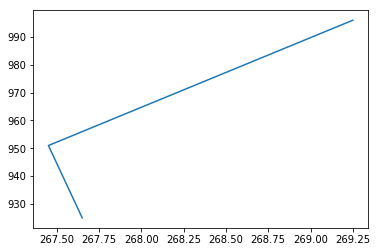

In [169]:
plt.plot(aux2[::-1], aux[::-1])

In [147]:
aux = np.insert(aux, 0, 926)

In [149]:
aux[::-1].sort()

In [153]:
aux

array([1000. ,  996. ,  958.5,  951. ,  926. ,  925. ,  921.7,  895. ,
        886.7,  852.9,  850. ,  820. ,  788.2,  757.7,  728.5,  700.3,
        700. ,  620.3,  595. ,  571.6,  526. ,  504.6,  500. ,  463.4,
        450. ,  443.8,  400. ,  365. ,  355.5,  324.1,  300. ,  281.4,
        250. ,  243. ,  231.8,  228. ,  220.9,  200. ,  197. ,  151.5,
        150. ,  112. ,  109.5,  100. ,   99.8,   95.4,   95. ,   88.9,
         82.7,   70. ,   65.8,   58.3,   50. ,   49.6,   44.5,   43.1,
         40.7,   37.4,   30. ,   28.3,   20.7,   20. ,   16.9,   16.8,
         16.1,   15.1,   10.6,   10.4,   10. ,    7. ,    6.9,    6.6])

In [151]:
pd.to_numeric(df_test["PRES"], errors='coerce').values

array([1000. ,  996. ,  958.5,  951. ,  925. ,  921.7,  895. ,  886.7,
        852.9,  850. ,  820. ,  788.2,  757.7,  728.5,  700.3,  700. ,
        620.3,  595. ,  571.6,  526. ,  504.6,  500. ,  463.4,  450. ,
        443.8,  400. ,  365. ,  355.5,  324.1,  300. ,  281.4,  250. ,
        243. ,  231.8,  228. ,  220.9,  200. ,  197. ,  151.5,  150. ,
        112. ,  109.5,  100. ,   99.8,   95.4,   95. ,   88.9,   82.7,
         70. ,   65.8,   58.3,   50. ,   49.6,   44.5,   43.1,   40.7,
         37.4,   30. ,   28.3,   20.7,   20. ,   16.9,   16.8,   16.1,
         15.1,   10.6,   10.4,   10. ,    7. ,    6.9,    6.6])

In [106]:
df_test.drop(ind)

,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT,THTA,THTE,THTV,Year,Month,Day,Hour
2230,1000.0,-30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.0,1.0,15.0,0.0
2231,996.0,5.0,-3.9,-4.5,96.0,2.76,90.0,39.0,269.6,277.1,270.0,2002.0,1.0,15.0,0.0
2232,958.5,305.0,-5.4,-5.8,97.0,2.61,120.0,40.0,271.0,278.3,271.4,2002.0,1.0,15.0,0.0
2233,951.0,366.0,-5.7,-6.0,98.0,2.58,126.0,40.0,271.3,278.5,271.7,2002.0,1.0,15.0,0.0
2234,925.0,582.0,-5.5,-5.8,98.0,2.69,145.0,38.0,273.7,281.2,274.1,2002.0,1.0,15.0,0.0
2235,921.7,610.0,-5.4,-5.7,98.0,2.73,145.0,38.0,274.1,281.7,274.5,2002.0,1.0,15.0,0.0


In [47]:
np.mean(tt[tt >0])

/home/caioruman/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


2.8397870233015445

In [52]:
df

,INV_S,INV_F,Hour,Date,STN_Number
0,2.165472,7.776561,0,1986-01-01 00:00:00,01001
1,2.280061,6.312292,12,1986-01-01 12:00:00,01001
2,2.216500,7.048458,100,1986-01-01 23:00:00,01001
3,3.445416,4.651163,0,1986-02-01 00:00:00,01001
4,2.681723,6.180470,12,1986-02-01 12:00:00,01001
5,3.011500,5.412054,100,1986-02-01 23:00:00,01001
6,1.579881,6.629213,0,1986-03-01 00:00:00,01001
7,2.255497,5.334847,12,1986-03-01 12:00:00,01001
8,1.879447,5.985319,100,1986-03-01 23:00:00,01001
9,1.940212,8.796296,0,1986-04-01 00:00:00,01001


In [98]:
df_aux = df2.query("Year == {0} and Month == {1} and Day == {2} and Hour == {3}".format(1985, 1, 27, 0))
df_aux2 = df2.query("Year == {0} and Month == {1} and Day == {2} and Hour == {3}".format(1985, 1, 27, 0))

In [101]:
np.isnan(df_aux.loc[ind-1,"TEMP"])

True

In [100]:
df_aux.loc[ind,"TEMP"]

-9.3

In [97]:
df_aux.loc[[ind-1,ind],:]# = df1.loc[3].values

,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT,THTA,THTE,THTV,Year,Month,Day,Hour
1954,1000.0,9.0,-9.3,-10.4,92.0,1.74,330.0,18.0,263.9,268.7,264.2,1985.0,1.0,27.0,0.0
1955,999.0,9.0,-9.3,-10.4,92.0,1.74,330.0,18.0,263.9,268.7,264.2,1985.0,1.0,27.0,0.0


In [96]:
df_aux.loc[[ind-1],:] = df_aux.loc[ind].values
df_aux.at[ind-1,'PRES'] = 1000.0

/home/caioruman/anaconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/caioruman/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
ind = df_aux[df_aux.PRES == 1000].index[0]+1
print(df_aux.loc[ind,"PRES"])

1000.0


In [41]:
for a,b in zip(pd.to_numeric(df_aux.TEMP), pd.to_numeric(df_aux2.TEMP)):
    print(b - a)

-5.140740740740742
1.141463414634146
-3.6000000000000005
-1.8444444444444443
1.1346153846153848
-0.9294117647058826
3.1545454545454543
-0.5333333333333337
-5.621052631578946
-5.7954545454545485
-3.928571428571429
nan
-1.7435897435897436
-2.841958041958042
-4.005660377358491
-0.6000000000000001
19.93333333333333
-4.6000000000000005
-6.09375
-5.744680851063832
-5.157142857142857
-5.328947368421052
-5.429629629629629
-5.1000000000000005
-4.96
-5.176991150442483
nan
-4.549494949494948
-4.777777777777775
-5.679611650485443
-4.909090909090905
-0.1513513513513498
-3.6888888888888918
1.4472727272727255
-2.864516129032258
-4.8
-5.583941605839416
-4.581818181818183
-4.170093457943924
-2.9496183206106865
nan
nan
-1.5208333333333335
2.1999999999999993
-1.2400000000000002
-0.5014084507042238
-2.4790697674418603
nan
nan
-3.4210526315789473
nan
nan
-5.7391304347826075
0.235294117647058
nan
nan
nan
0.1999999999999993
-2.789285714285713
-1.844444444444445
-5.689655172413792
-5.0
-4.57142857142857
-6.26

In [18]:
df_aux2 = df.query("{0} <= Year <= {1} and Hour == {2} and PRES == {3}".format(1985, 2015, 0, 925))

In [26]:
df_aux2

,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT,THTA,THTE,THTV,Date,Day,Month,Year,Hour,Location
3,925.0,879.222222,-6.840741,-9.951852,80.296296,2.032222,275.037037,19.037037,272.300000,278.088889,272.648148,1985-01-01 00:00:00,1,1,1985,0,1001
3,925.0,881.243902,-2.158537,-19.085366,27.414634,0.953415,146.560976,11.097561,277.109756,279.982927,277.229268,1985-01-02 00:00:00,2,1,1985,0,1001
3,925.0,826.750000,-4.900000,-21.000000,32.000000,0.875000,196.750000,15.250000,274.325000,276.925000,274.475000,1985-01-03 00:00:00,3,1,1985,0,1001
3,925.0,811.333333,-1.644444,-5.311111,77.111111,2.837222,204.111111,12.000000,277.600000,285.694444,278.116667,1985-01-04 00:00:00,4,1,1985,0,1001
3,925.0,861.346154,-1.565385,-17.334615,28.692308,1.069615,335.346154,19.000000,277.738462,280.976923,277.938462,1985-01-05 00:00:00,5,1,1985,0,1001
3,925.0,834.058824,1.270588,-1.329412,83.000000,3.767059,269.470588,14.647059,280.605882,291.323529,281.223529,1985-01-06 00:00:00,6,1,1985,0,1001
3,925.0,749.454545,0.254545,-11.290909,41.545455,1.763636,307.090909,4.090909,279.536364,284.772727,279.827273,1985-01-07 00:00:00,7,1,1985,0,1001
3,925.0,728.000000,-3.833333,-17.500000,34.000000,1.053333,330.000000,28.333333,275.400000,278.533333,275.533333,1985-01-08 00:00:00,8,1,1985,0,1001
3,925.0,796.052632,-15.121053,-15.252632,98.684211,1.268421,349.684211,15.000000,263.805263,267.400000,264.005263,1985-01-09 00:00:00,9,1,1985,0,1001
3,925.0,693.079545,-9.895455,-10.501136,96.011364,1.865455,259.602273,10.704545,269.185227,274.459091,269.485227,1985-01-10 00:00:00,10,1,1985,0,1001


In [3]:
stations.close()